# Generating the task

In [ ]:
from zlib import crc32
import numpy as np

types = ['regression', 'classification']
datasets = {'regression': [{'name': 'Servo Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Servo'},
                           {'name': 'Forest Fires Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Forest+Fires'},
                           {'name': 'Boston Housing Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston'},
                           {'name': 'Diabetes Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'}],
            'classification': [{'name': 'Spambase Data Set',
                                'url': 'https://archive.ics.uci.edu/ml/datasets/Spambase'},
                               {'name': 'Wine Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine'},
                               {'name': 'Breast Cancer Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer'},
                               {'name': 'MNIST',
                                'url': 'http://yann.lecun.com/exdb/mnist/'}]}
methods = {'regression': ['Линейная регрессия',
                          'Перцептрон',
                          'Надарая-Ватсона',
                          'SVR'],
           'classification': ['Логистическая регрессия',
                              'Перцептрон',
                              'k-ближайших соседей',
                              'Метод потенциальных функций',
                              'Метод Парзеновского окна',
                              'SVM']}
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
task['id'] = crc32(task['mail'].encode('utf-8'))
np.random.seed(task['id'])
task['type'] = np.random.choice(types)
task['dataset'] = np.random.choice(datasets[task['type']])
task['method'] = np.random.choice(
    methods[task['type']], size=3, replace=False).tolist()


task


Enter your mail: biryukov.ns@phystech.edu


{'mail': 'biryukov.ns@phystech.edu',
 'id': 3647263774,
 'type': 'classification',
 'dataset': {'name': 'Spambase Data Set',
  'url': 'https://archive.ics.uci.edu/ml/datasets/Spambase'},
 'method': ['Перцептрон',
  'k-ближайших соседей',
  'Метод потенциальных функций']}

# Task overview


## Prerequisites:
- Dataset: [Spambase](https://archive.ics.uci.edu/ml/datasets/Spambase)
- Knowledge:
  1. Methods: [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html), [Potential functions (en)](https://sites.ecse.rpi.edu/~agung/Research/06426153.pdf), [Potential functions (ru)](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BF%D0%BE%D1%82%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D1%85_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B9).
  2. Python libraries: [numpy](https://numpy.org/doc/stable/), [pandas](https://pandas.pydata.org/docs/), [seaborn](https://seaborn.pydata.org/).
  3. Principal component analysis: [PCA (ru)](https://habr.com/ru/articles/304214/), [PCA (en)](https://www.geeksforgeeks.org/principal-component-analysis-with-python/).
- [ML Course](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%28%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9%2C_%D0%9A.%D0%92.%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%86%D0%BE%D0%B2%29) (MIPT)


## Task:


Analyse dataset using 3 different methods: KNN, Perceptron, Potential functions. Summarize and compare your results.

# Solution

## Installing libraries

Let's get started by installing requirements

In [ ]:
import warnings
warnings.filterwarnings("ignore")

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    !pip install scikit-plot ucimlrepo matplotlib seaborn pandas tqdm scipy numpy torch scikit-learn mlxtend

## Taking a look at the database

First of all, let's fetch the dataset. I suggests using **ucimlrepo** package as suggested in datasets' description:



In [6]:
# importing necessary libraries
import pandas as pd
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import math

# to split matrices into train and test subsets
from sklearn.model_selection import train_test_split
# KNN method
from sklearn.neighbors import KNeighborsClassifier
# PCA
from sklearn.decomposition import PCA

Get the dataset:

In [7]:
# fetching dataset
spambase = fetch_ucirepo(id=94) # 94 is the spambase ID

# getting data (as pandas dataframes)
features = spambase.data.features
targets = spambase.data.targets

In [8]:
meta = spambase.metadata

print(meta.abstract, '\n')

print("Total instances:", meta.num_instances)

print("Total features:", meta.num_features)

print("Feature types:", meta.feature_types)

Classifying Email as Spam or Non-Spam 

Total instances: 4601
Total features: 57
Feature types: ['Integer', 'Real']


In [9]:
# random seed
np.random.seed(abs(hash("meow")) % 2**32)
# we want last column to be called 'is_spam' instead of 'Class'
features_list = spambase.data.headers.tolist()[:-1] + ['is_spam']
# take a look at features
for a, b, c in zip(features_list[::3], features_list[1::3], features_list[2::3]):
  print('{:<30}{:<30}{:<}'.format(a,b,c))

word_freq_make                word_freq_address             word_freq_all
word_freq_3d                  word_freq_our                 word_freq_over
word_freq_remove              word_freq_internet            word_freq_order
word_freq_mail                word_freq_receive             word_freq_will
word_freq_people              word_freq_report              word_freq_addresses
word_freq_free                word_freq_business            word_freq_email
word_freq_you                 word_freq_credit              word_freq_your
word_freq_font                word_freq_000                 word_freq_money
word_freq_hp                  word_freq_hpl                 word_freq_george
word_freq_650                 word_freq_lab                 word_freq_labs
word_freq_telnet              word_freq_857                 word_freq_data
word_freq_415                 word_freq_85                  word_freq_technology
word_freq_1999                word_freq_parts               word_freq_pm
word_freq_di

## Preparing the database

Let's create DataFrame using pandas

In [10]:
# creating dataframe
spam_dataset = pd.DataFrame(features, columns=features_list)
# assigning is_spam column
spam_dataset['is_spam'] = targets
# let's check how it looks like
spam_dataset.sample(n = 7)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
2816,0.00,0.00,0.20,0.0,0.00,0.10,0.00,0.51,0.00,0.10,...,0.080,0.160,0.000,0.000,0.053,0.000,2.224,19,574,0
343,0.63,0.00,0.63,0.0,1.27,0.00,0.63,0.00,0.00,0.00,...,0.100,0.000,0.000,0.501,0.300,0.000,2.458,22,118,1
3717,0.00,0.00,0.00,0.0,0.00,0.57,0.00,0.00,0.00,0.28,...,0.144,0.192,0.096,0.000,0.000,0.000,2.306,19,203,0
3355,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.84,...,0.000,0.000,0.119,0.000,0.000,0.000,1.454,9,32,0
575,1.18,0.39,0.59,0.0,0.00,0.98,0.19,0.19,1.38,0.39,...,0.000,0.231,0.000,0.745,0.308,0.025,6.652,76,632,1
1875,0.00,0.16,0.32,0.0,0.16,0.00,0.00,0.16,0.16,0.00,...,0.000,0.124,0.000,0.000,0.000,0.110,4.771,63,1064,0
674,0.00,0.00,0.00,0.0,3.33,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,1.111,0.000,0.000,1.409,10,31,1


### Removing the dublicates and fake spam words

Dataset description says:

  "*Our collection of non-spam
	e-mails came from filed work and personal e-mails, and hence
	the word 'george' and the area code '650' are indicators of
	non-spam.*"

Therefore, we should set all **is_spam** value to **0** for every 'george' of '650' in the dataset.

We will do it with ```loc()``` function, you can read about it [here](https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html).

In [11]:
# get all rows with needed words
not_spam_cond = (spam_dataset['word_freq_george'] > 0) | (spam_dataset['word_freq_650'] > 0)
# set is_spam value to 0 (False)
spam_dataset.loc[not_spam_cond, 'is_spam'] = 0 # False

Now we need to remove the dublicates to avoid excessive work to be done later. Let's use ```drop_duplicates()```, you can read about it [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html).

In [12]:
# removing duplicates
spam_dataset = spam_dataset.drop_duplicates()

## Correlations

Let's take a look at how some word frequencies correlate with each other.

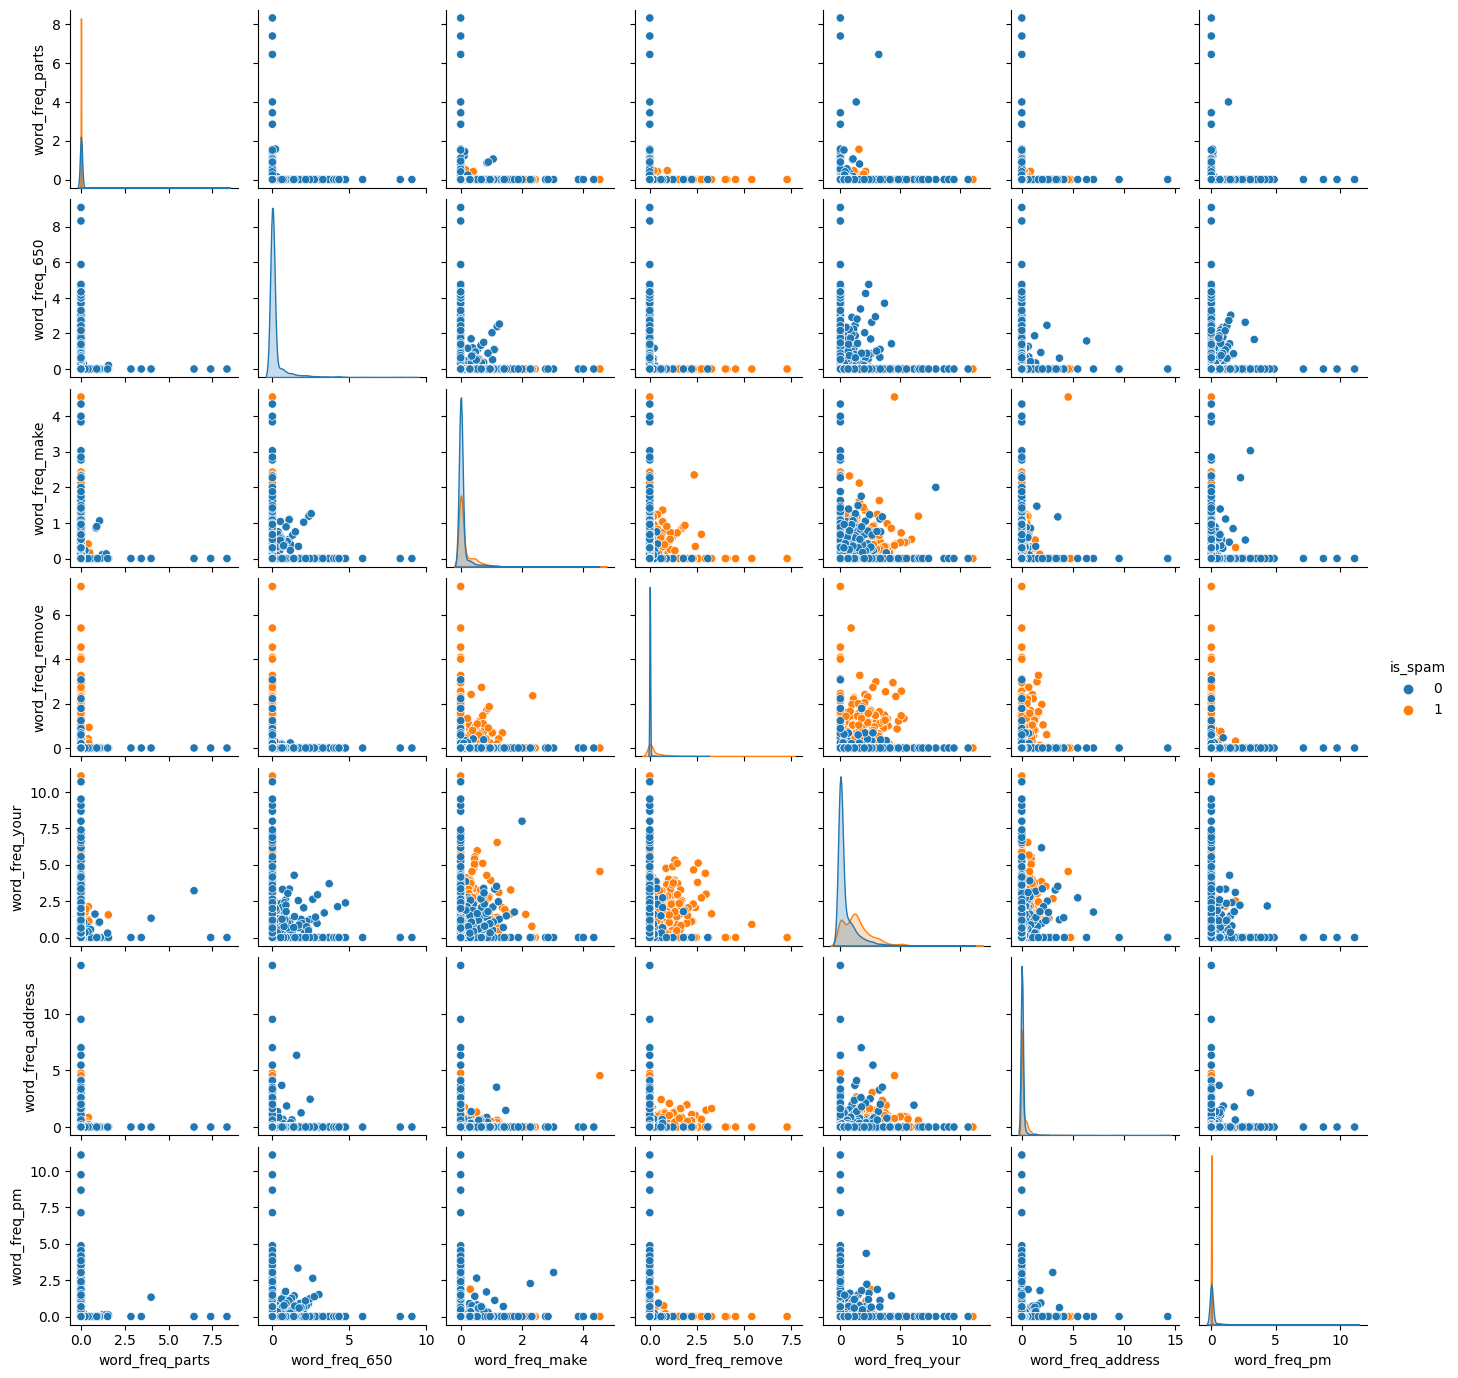

In [13]:
import random

cols_to_plot = random.sample(spam_dataset.columns.tolist()[:48], 7) + ['is_spam']
seaborn.pairplot(spam_dataset[cols_to_plot], height=2, hue='is_spam')
plt.show()

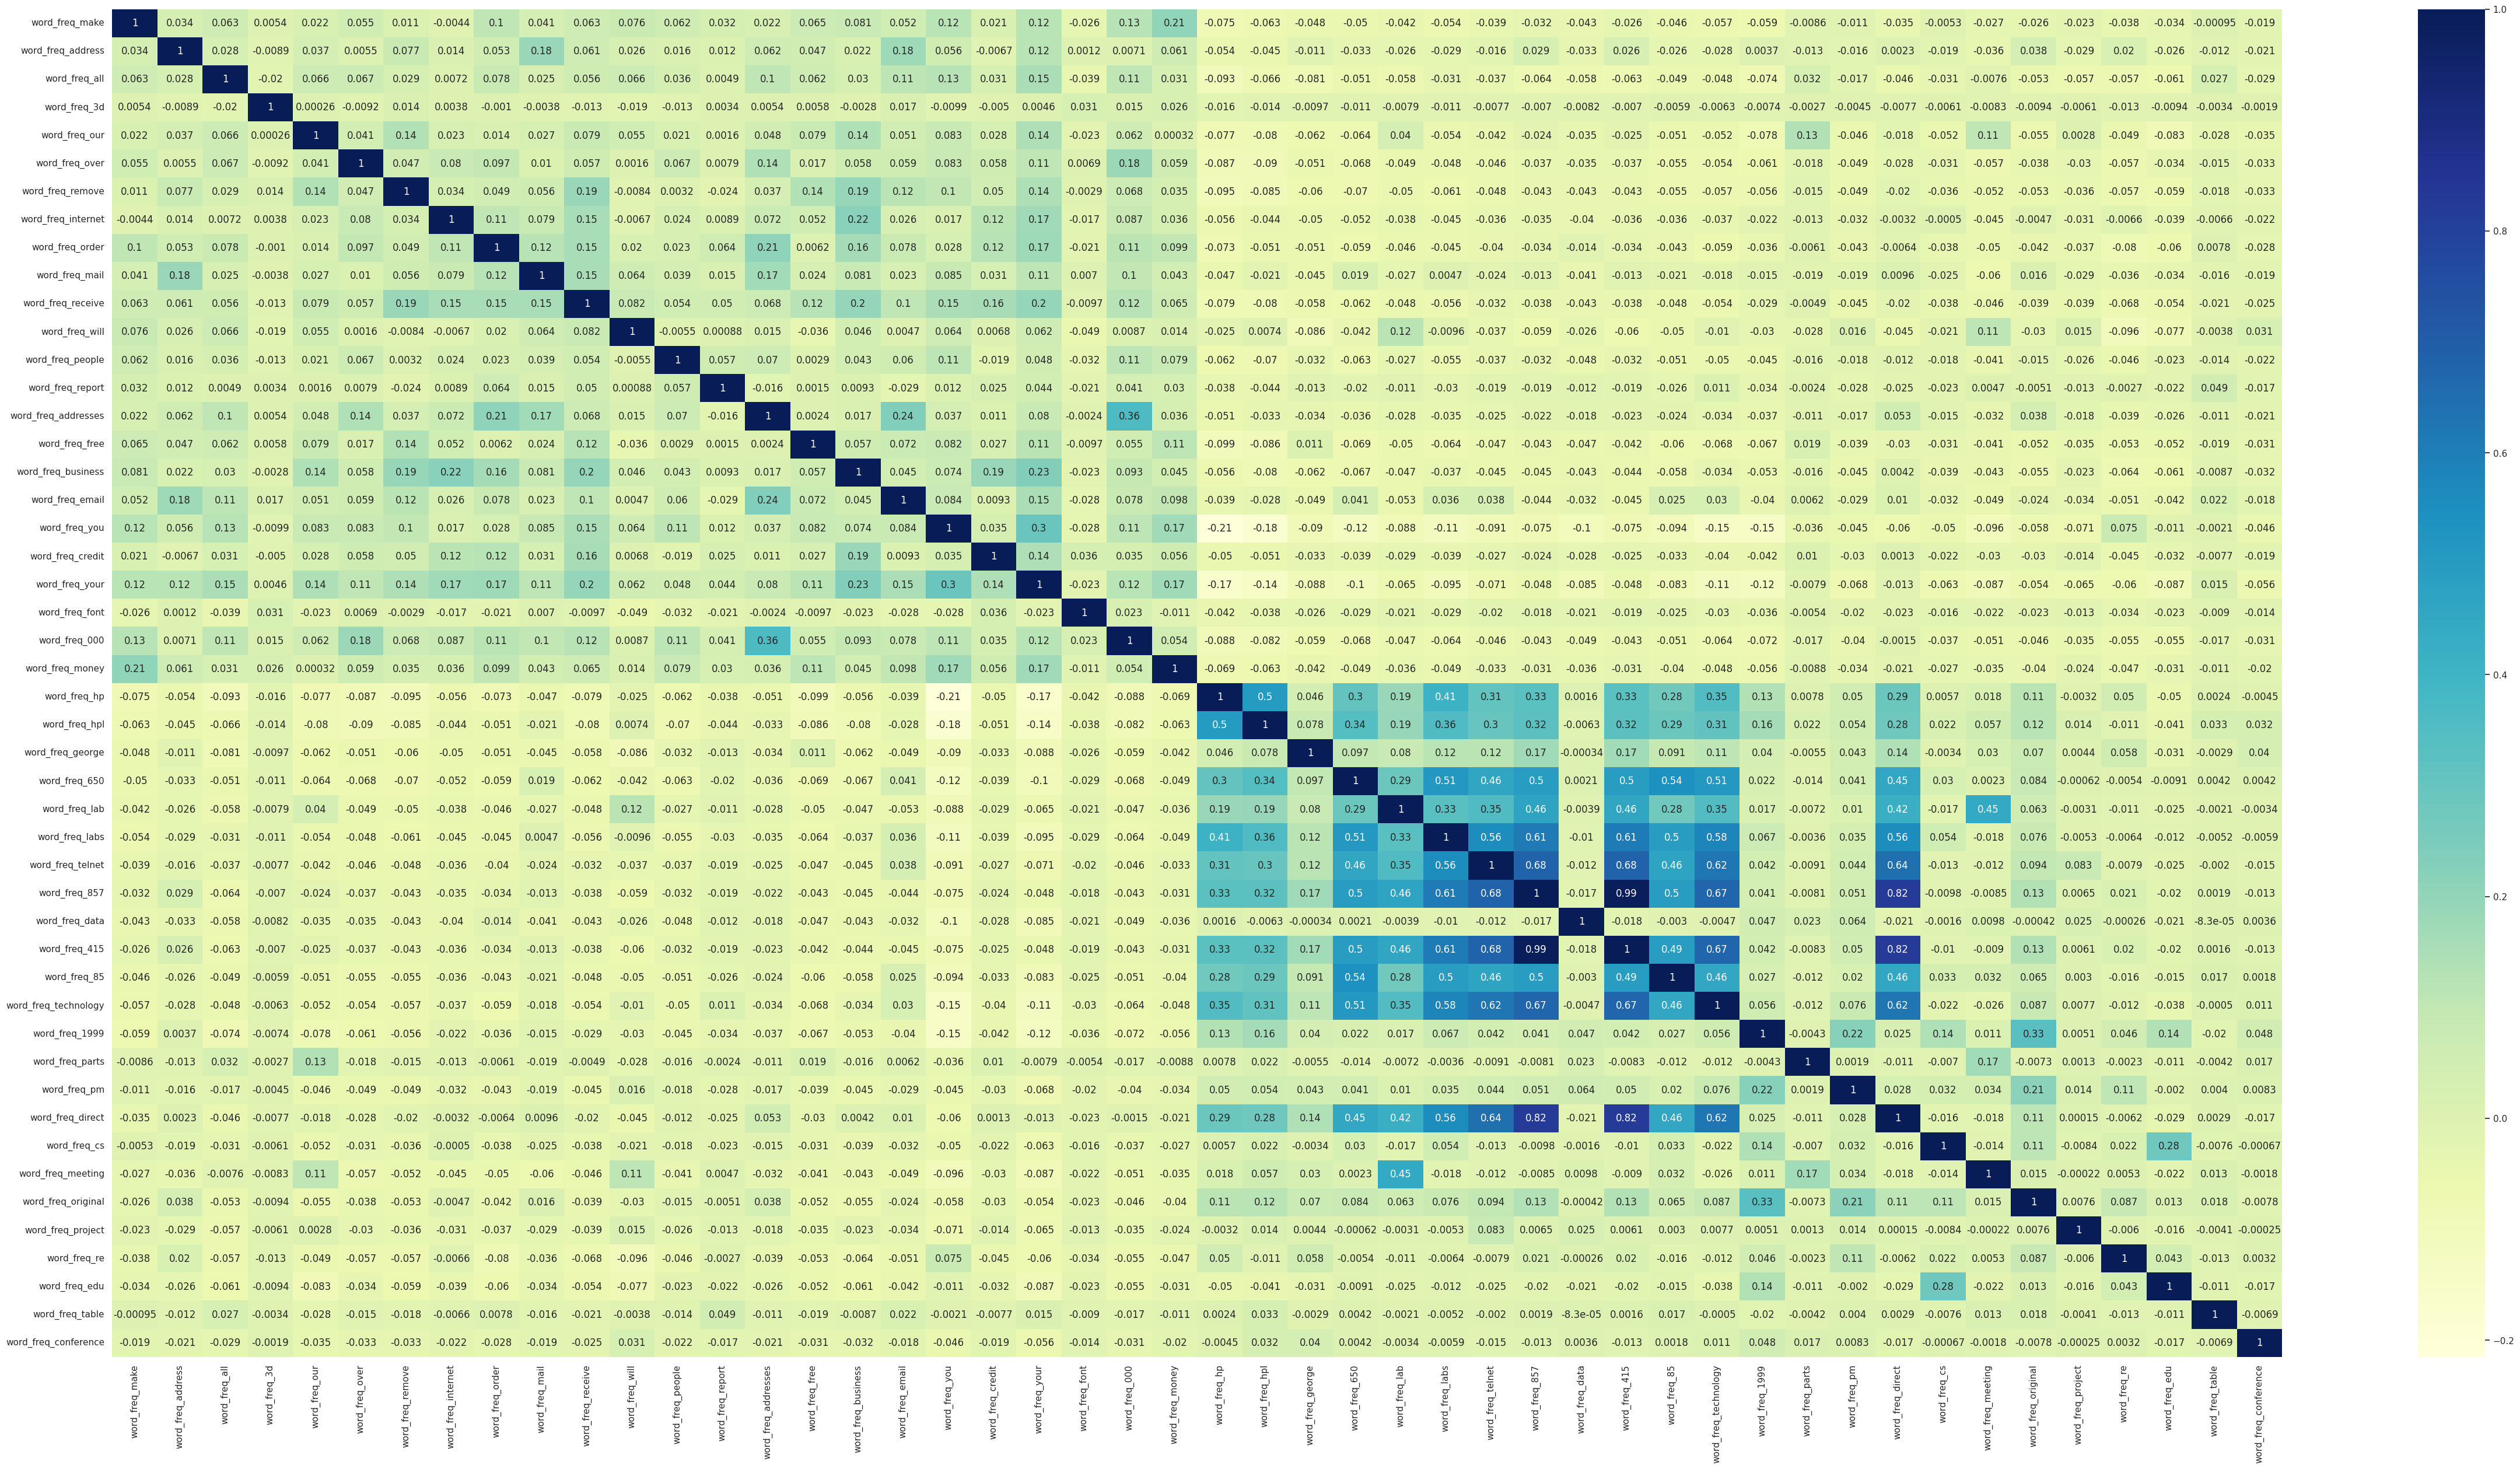

In [ ]:
seaborn.set(rc={'figure.figsize':(60,30)})
seaborn.heatmap(spam_dataset.iloc[:, :-10].corr(), annot=True, cmap="YlGnBu")
plt.show()

Some features have a high linear correlations:

- word_freq_857    / word_freq_415  - 0.99
- word_freq_telnet / word_freq_labs - 0.61

Let's use the PCA to reduce the amount of features. Notice that we'll need to save edited dataset to apply PCA, since it's operations are irreversible.

In [14]:
# save dataframe to reuse it with other methods later
spam_dataset.to_csv('spam_updated.csv', index = False)

In [15]:
# read modified dataset now
mod_spam = pd.read_csv('spam_updated.csv', header = 0)

# split into feature/target
feat_mod = mod_spam.iloc[:, :57]
targets_mod = mod_spam.iloc[:, 57]

from sklearn.preprocessing import StandardScaler

# using StandardScaler to scale all features
scaler = StandardScaler()
scaled_x_axis = scaler.fit_transform(feat_mod)


In [16]:
# 92% feature usability to be preserved
pca = PCA(0.90)
feat_pca = pca.fit_transform(scaled_x_axis)
# lets check the result
mod_spam.shape, feat_pca.shape


((4210, 58), (4210, 44))

## KNN method

In [17]:
# making test/train
Xt, Xtst, Yt, Ytst = train_test_split(feat_pca, targets_mod, random_state = 0, test_size = 0.2)

# p shows total count of awaited outcomes (0 and 1 in out case)
knn_classifier = KNeighborsClassifier(n_neighbors=int(math.sqrt(len(Ytst))), p = 2, metric='euclidean')
knn_classifier.fit(Xt, Yt)

# prediction
prediction = knn_classifier.predict(Xtst)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model using confusion matrix
conf_matrix = confusion_matrix(Ytst, prediction)
conf_matrix

array([[468,  35],
       [ 69, 270]])

Here we can see that only 35 email's were identified as spam false-positively. Let's check out the confusion matrix as a graph.

In [19]:
# printing the experimental results
print(classification_report(Ytst,prediction))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       503
           1       0.89      0.80      0.84       339

    accuracy                           0.88       842
   macro avg       0.88      0.86      0.87       842
weighted avg       0.88      0.88      0.88       842



<Figure size 1000x600 with 0 Axes>

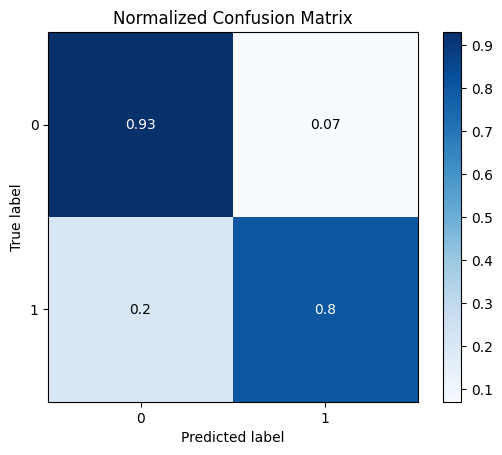

In [20]:
import scikitplot as skplt
from matplotlib.pyplot import figure
# set figure size
plt.figure(figsize=(10, 6))

# create and show a plot
skplt.metrics.plot_confusion_matrix(Ytst, prediction, normalize = True)
plt.show()

## Perceptron method

Let's test Perceptron's accuracy.

In [31]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# read modified dataset now
mod_spam = pd.read_csv('spam_updated.csv', header = 0)

# split into feature/target
feat_mod = mod_spam.iloc[:, :57]
targets_mod = mod_spam.iloc[:, 57]

from sklearn.preprocessing import StandardScaler

# using StandardScaler to scale all features
scaler = StandardScaler()
scaled_x_axis = scaler.fit_transform(feat_mod)

# 90% feature usability to be preserved
pca = PCA(0.90)
feat_pca = pca.fit_transform(scaled_x_axis)
# lets check the result
mod_spam.shape, feat_pca.shape

# making test/train
Xt, Xtst, Yt, Ytst = train_test_split(feat_pca, targets_mod, random_state = 0, test_size = 0.2)

p = Perceptron(random_state=42)
p.fit(Xt, Yt)

prediction = p.predict(Xtst)
conf_matrix = confusion_matrix(Ytst, prediction)
print(conf_matrix)

# printing the experimental results
print(classification_report(Ytst,prediction))

[[448  55]
 [ 27 312]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       503
           1       0.85      0.92      0.88       339

    accuracy                           0.90       842
   macro avg       0.90      0.91      0.90       842
weighted avg       0.91      0.90      0.90       842



## Constant function method

In [34]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

class PFM(object):
    def __init__(self, kernel=None):
        self.X, self.Y, self.gams = None, None, None
        self.kernel = lambda x: np.ones_like(x)
        if kernel is not None:
            self.kernel = kernel
    def scores(self, X):
        features = self.gams * self.kernel(cdist(X, self.X))
        scores = np.vstack(
            [np.sum(features.T[np.where(self.Y==0)[0]].T, axis=-1),
             np.sum(features.T[np.where(self.Y==1)[0]].T, axis=-1)]).T
        return scores
    def predict(self, X):
        return np.argmax(self.scores(X), axis=-1)
    def fit(self, X, Y, epoch=10):
        self.X, self.Y, self.gams = np.array(X), np.array(Y), np.zeros_like(Y)
        for _ in range(epoch):
            for i, (x, y) in enumerate(zip(self.X, self.Y)):
                if self.predict(np.array([x]))[0] != y:
                    self.gams[i] += 1

def K(distance, h=0.05):
    ret = np.array(distance)/h
    return (1 - ret**2) * (np.abs(ret) <= 1)

# read modified dataset now
mod_spam = pd.read_csv('spam_updated.csv', header = 0)

# split into feature/target
feat_mod = mod_spam.iloc[:, :57]
targets_mod = mod_spam.iloc[:, 57]

from sklearn.preprocessing import StandardScaler

# using StandardScaler to scale all features
scaler = StandardScaler()
scaled_x_axis = scaler.fit_transform(feat_mod)

# 90% feature usability to be preserved
pca = PCA(0.90)
feat_pca = pca.fit_transform(scaled_x_axis)
# lets check the result
mod_spam.shape, feat_pca.shape

# making test/train
Xt, Xtst, Yt, Ytst = train_test_split(feat_pca, targets_mod, random_state = 0, test_size = 0.2)

p = PFM(kernel=lambda x: K(x, h=0.5))
p.fit(Xt, Yt)

prediction = p.predict(Xtst)
conf_matrix = confusion_matrix(Ytst, prediction)
print(conf_matrix)

# printing the experimental results
print(classification_report(Ytst,prediction))

[[499   4]
 [207 132]]
              precision    recall  f1-score   support

           0       0.71      0.99      0.83       503
           1       0.97      0.39      0.56       339

    accuracy                           0.75       842
   macro avg       0.84      0.69      0.69       842
weighted avg       0.81      0.75      0.72       842

